In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('proposals_preprocess_0812_cleaned.xlsx')

# 1. Intro: Simple Statistics of Proposal Dataset

- Total rows: 20767
  - Before removing similar proposals: 20918

- Columns

In [2]:
df.shape, df.columns

((20767, 39),
 Index(['id', 'end', 'app', 'ipfs', 'type', 'body', 'link', 'title', 'start',
        'state', 'votes', 'author', 'symbol', 'quorum', 'scores', 'created',
        'updated', 'network', 'plugins', 'choices', 'privacy', 'flagged',
        'snapshot', 'strategies', 'validation', 'discussion', 'quorumType',
        '__typename', 'scores_state', 'scores_total', 'scores_updated',
        'scores_by_strategy', 'space_id', 'lang', 'Class A', 'Class B',
        'Class C', 'body_lower', 'title_lower'],
       dtype='object'))

### Columns Containing NaN Values

In [3]:
for c in df.columns[:-3]:
    x = df[c].isna().sum()
    if x > 0:
        print(c, x)

app 8716
symbol 5005
updated 20580
privacy 20136
discussion 13326
scores_state 9
Class A 20505
Class B 20536


### Columns That Are Nearly Empty

In [4]:
for c in ["plugins", "validation", "quorum"]:
    temp = df[c].value_counts() 
    print(c, temp.index[0], temp[0])
    print()

plugins {} 20445

validation {'params': {}} 20450

quorum 0.0 15948



### Sample data

In [5]:
df.iloc[100]

id                    0xa8fbe52b54740b3229b16b52eb4e19076052f6dcbd62...
end                                                 2023-02-14 06:00:00
app                                                            snapshot
ipfs                  bafkreibv7tjfz4sksmseddjv7s6ack43c3xpbdidku6no...
type                                                      single-choice
body                  [PR with multisig payload](\n*Summary:*\n Due ...
link                  https://snapshot.org/#/balancer.eth/proposal/0...
title                       [BIP-182] Enable bb-rf-USD Gauge [Arbitrum]
start                                               2023-02-10 06:00:00
state                                                            closed
votes                                                               312
author                       0x9f74662aD05840Ba35d111930501c617920dD68e
symbol                                                            veBAL
quorum                                                        20

In [6]:
df.head()

,id,end,app,ipfs,type,body,link,title,start,state,...,scores_total,scores_updated,scores_by_strategy,space_id,lang,Class A,Class B,Class C,body_lower,title_lower
0,0x4849a9ad5e15af25569061b6855d3e51d8b175ae694d...,2022-08-29 23:59:00,snapshot,bafkreiau6jpf3pk2qacq3afgvkkg37yvlhdv65vrv7oid...,single-choice,Background of the proposal While the card powe...,https://snapshot.org/#/tcgverse.eth/proposal/0...,\tUser Governance Suggestion/\t,2022-08-23 00:03:56,closed,...,2.605603e+05,1661785146,"[[65, 226199.5545767319], [25, 34270.726811205...",tcgverse.eth,en,NaN,NaN,NaN,background of the proposal while the card powe...,user governance suggestion/
1,0xc6ddfca763cb36bae79a6adef60e4eaf03b60c9b7c85...,2022-01-25 06:05:00,NaN,Qmcz5pvLTyZ2Nm65mbg9izizypt1FavYVwhMrmA2sFcezQ,basic,"Description:\nCurrently, SpiritSwaps gauge sys...",https://snapshot.org/#/spiritswap.eth/proposal...,Go Back BACK Add a Gauge for SpiritSwaps Le...,2022-01-18 06:05:00,closed,...,2.158755e+07,1643058323,"[[3439983.6266650585], [8269542.723191773], [9...",spiritswap.eth,en,NaN,NaN,NaN,description \ncurrently spiritswaps gauge sys...,go back back add a gauge for spiritswaps lendi...
2,QmQfm26pDmhM8yVemvXshxxJDZwfpiAjsTEiGgXjWGVaum,2022-01-23 15:03:00,NaN,QmQfm26pDmhM8yVemvXshxxJDZwfpiAjsTEiGgXjWGVaum,single-choice,(qiuhouhongye#b17c)\n dcldcl\n- \n- \n- Inva...,https://snapshot.org/#/snapshot.dcl.eth/propos...,nftnft,2022-01-16 15:03:00,closed,...,2.068505e+05,1642917800,"[[0, 128000, 0, 74575.52888889765, 200, 0], [0...",snapshot.dcl.eth,en,NaN,NaN,NaN,qiuhouhongye b17c \n dcldcl\n \n \n invalid...,nftnft
3,0x32f752190c2eb77f4a9983d95149b42f850806948528...,2022-08-16 15:00:00,snapshot,bafkreicvbxx4dqrddeagdef4sfyrbd3rdx2hjhmbwxpsi...,single-choice,# Summary\nAfter working with DappBack success...,https://snapshot.org/#/shapeshiftdao.eth/propo...,[SCP 98] Increasing DappBack Funding,2022-08-09 23:39:54,closed,...,1.577094e+06,1660629605,"[[276348.7534241498, 0, 0, 79337.88379679648, ...",shapeshiftdao.eth,en,NaN,NaN,NaN,summary\nafter working with dappback successfu...,[scp 98] increasing dappback funding
4,0x66d197533b713be81ac21a56fdc528c23afa57f65aa6...,2023-03-24 02:30:00,snapshot,bafkreib27t5c5awi3vehhjvt4wjbb3ycblcmzxj6lhc3c...,single-choice,\n There is a shutter function on Snapshot tha...,https://snapshot.org/#/glmrapes.eth/proposal/0...,ANONYMOUS VOTES,2023-03-22 03:00:00,closed,...,1.010000e+02,1679592606,"[[35], [19], [47]]",glmrapes.eth,en,NaN,NaN,NaN,there is a shutter function on snapshot that h...,anonymous votes


### Columns with Nearly Identical Values

In [7]:
for c in ["quorumType", "scores_state", "__typename", "state", "lang", "privacy"]:
    print(df[c].value_counts())
    print()

# 단, privacy는 대부분 null 

default    20767
Name: quorumType, dtype: int64

final    20758
Name: scores_state, dtype: int64

Proposal    20767
Name: __typename, dtype: int64

closed    20767
Name: state, dtype: int64

en    20767
Name: lang, dtype: int64

shutter    631
Name: privacy, dtype: int64



### Count of Each Value in the Specified Column

In [8]:
df["author"].value_counts()

0x5E23D08324f017d5425e59A2782C9ae27aCE0958    1240
0xBB7B59Afa3A0E5Be143b8fE9C641F00c1ecB9d69    1078
0x724061efDFef4a421e8be05133ad24922D07b5Bf     322
0xc3d6f21c79C2567A1858d8b93a4EDBD9dB399d9d     315
0xFAD69Bd739c64cC8e3f1C3bb3B60fe4f160174Cc     294
                                              ... 
0xDbCA6155C197BD64FeB008d82e95C9c7B58F67e6       1
0x4A5EcF0183001c3980fc002670199D8f17F5F7a7       1
0xd6C7c628CacaE68da1D53273db57b303228F6dFc       1
0xc329C67338a17741Fe1f69982F97430271ea78c8       1
0x63009AE2Bad374C3aDACa32c220F704581363aF4       1
Name: author, Length: 3409, dtype: int64

In [9]:
df["author"].value_counts().describe()

count    3409.000000
mean        6.091816
std        32.873969
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max      1240.000000
Name: author, dtype: float64

In [10]:
df["scores"].value_counts()

[0, 0]                                                         28
[12, 0]                                                        13
[12, 0, 0]                                                     12
[1090149.7629480332, 0, 2000342.6]                             12
[8, 0]                                                         11
                                                               ..
[1943.7899316426951, 125.43471789377476]                        1
[243, 8]                                                        1
[3308366.534076784, 115048.57695947617]                         1
[3578524.370561624, 39519.54304532145, 35581.40995378613]       1
[21551.668878425327, 5536832.137618381, 1113471.6192419045]     1
Name: scores, Length: 20371, dtype: int64

In [11]:
df["network"].value_counts()

1        15937
56        2299
137        897
42161      577
250        274
1088       244
1284       204
100        102
43114       79
592         50
2400        47
10          34
321         17
324          3
4            2
8453         1
Name: network, dtype: int64

In [12]:
df["choices"].str.lower().value_counts()

['for', 'against', 'abstain']                                                                                                       3065
['yes', 'no']                                                                                                                       3009
['for', 'against']                                                                                                                  1646
['yes', 'no', 'abstain']                                                                                                            1243
['yae', 'nay', 'abstain']                                                                                                            401
                                                                                                                                    ... 
['i work in cryptocurrency', "i don't work in cryptocurrency ", "i'm a beginner", "i'll donate to your dream", 'happy birthday']       1
['i accept the idea!', 'i do not accept t

In [13]:
df["strategies"].value_counts()

[{'network': '56', 'params': {'symbol': 'CAKE', 'address': '0x0E09FaBB73Bd3Ade0a17ECC321fD13a19e81cE82', 'decimals': 18}}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [14]:
df["scores_total"].value_counts()

1.200000e+01    51
1.300000e+01    46
1.100000e+01    43
1.000000e+01    42
1.400000e+01    42
                ..
7.990863e+05     1
4.405783e+05     1
1.765608e+05     1
8.357407e+05     1
6.671855e+06     1
Name: scores_total, Length: 19045, dtype: int64

In [15]:
df["scores_by_strategy"].value_counts()

[[0], [0]]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                28
[[12], [0]]                                                                                                                                                                                                                                                                                                                                                                                                                                                                               13
[[761588.5729547191, 328561.1899933141], [0, 0

# 2. Proposal Counts for Each Space

### Proposal Counts for Each Space
- Total count
- Mean
- Standard Deviation
- Percentile

In [16]:
space_counts = df['space_id'].value_counts()
space_counts.describe()

count     245.000000
mean       84.763265
std       194.916231
min         1.000000
25%        22.000000
50%        38.000000
75%        78.000000
max      2318.000000
Name: space_id, dtype: float64

In [17]:
print("Spaces under 5 proposals:", space_counts[space_counts <= 5].shape)

print("Spaces under 10 proposals:", space_counts[space_counts <= 10].shape)
space_counts[space_counts <= 10]

Spaces under 5 proposals: (21,)
Spaces under 10 proposals: (28,)


poktdao.eth               10
concentratordao.eth        9
primexyz.eth               9
infinex.eth                8
btcismylove.eth            7
paragonsdao.eth            7
pnounsdao.eth              7
goopsnapshot.eth           5
web3-no1.eth               4
meiridi.eth                3
rusha.eth                  3
babyfive.eth               3
dorg.eth                   3
digitalriyal.eth           2
thehong.eth                2
fabien.eth                 2
insuretoken.eth            2
pozoaxel.eth               1
cuchorapido.eth            1
01meta.eth                 1
xxx.freesubs.eth           1
apollodao.eth              1
signinhere.eth             1
kwenta.eth                 1
defjnite.eth               1
biteren.eth                1
haitang.eth                1
lens.changliuchuan.eth     1
Name: space_id, dtype: int64

In [18]:
temp = space_counts[space_counts <= 2].index.tolist()

print("Spaces under 2 proposals:", len(temp))

df[df["space_id"].isin(temp)][["title", "body", "space_id"]].sort_values(by="space_id")

Spaces under 2 proposals: 15


,title,body,space_id
15555,Proposal - Make Polygon a Country,If no one is saying I got a Proposal For you: ...,01meta.eth
15036,Partnership & Mutual Grant with Gitcoin,Developer DAOs mission is to accelerate the ed...,apollodao.eth
10627,FROGAGA Lucky Box Airdrops,Upcoming trending NFT series! #FROGAGA Lucky B...,biteren.eth
16540,Propuesta para sueldo retroactivo de Stovedove,"User: Stovedove\nCantidad: 150,000\n75%: 112,5...",cuchorapido.eth
11501,Have you already done Tabi?,"According to developers, the funds will be pri...",defjnite.eth
12980,Launch quests | $ZK,Perform simple tasks and wait for drop $ZK tok...,digitalriyal.eth
19531,Topaz Aptos AIRDR0P APT,The long-awaited drop from Topaz.\nTo particip...,digitalriyal.eth
19368,This is a long title this is a long title this...,This is a long title this is a long title this...,fabien.eth
18734,Snapshot Hackathon #1,Weight rank the projects you like\n*\n# Treasu...,fabien.eth
4189,[Phase 2] HIP-54: Airdrop to Democratic Heroes,Modify the term of office of the elected Missi...,haitang.eth


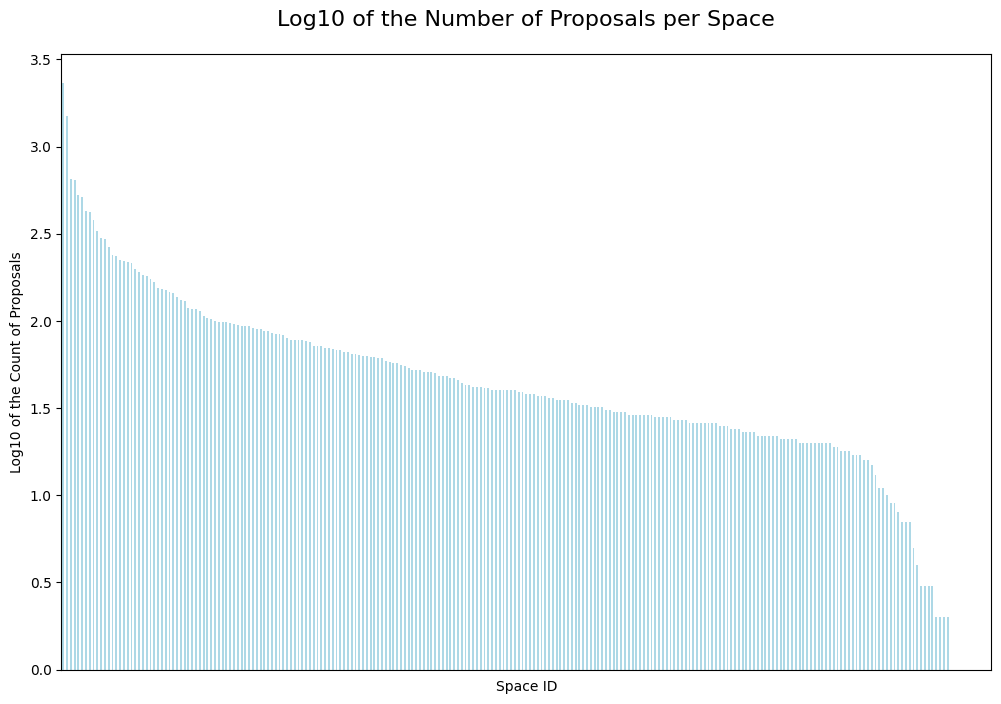

In [19]:
log_space_counts = np.log10(space_counts)

plt.figure(figsize=(12, 8))
log_space_counts.plot(kind='bar', color='lightblue')
plt.xlabel('Space ID')
plt.ylabel('Log10 of the Count of Proposals')
plt.title('Log10 of the Number of Proposals per Space',
          pad=20, fontsize=16)
plt.xticks([], [])  # Remove x-axis ticks
plt.show()

### Number of Followers, Proposals, and Votes for Each Space 
- Proposal count and vote count in this section are the number ***before preprocessing deletion***

(245, 47)


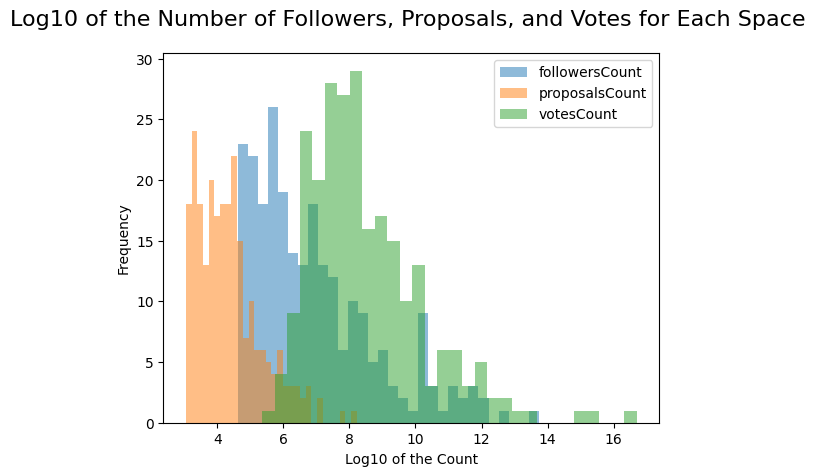

In [20]:
df_space = pd.read_excel('spaces_cut.xlsx')
df_space = df_space[df_space['id'].isin(space_counts.index)]
print(df_space.shape)

plt.hist(df_space['followersCount'].apply(np.log), label="followersCount", alpha=0.5, bins=30)
plt.hist(df_space['proposalsCount'].apply(np.log), label="proposalsCount", alpha=0.5, bins=30)
plt.hist(df_space['votesCount'].apply(np.log), label="votesCount", alpha=0.5, bins=30)
plt.xlabel('Log10 of the Count')
plt.ylabel('Frequency')
plt.title('Log10 of the Number of Followers, Proposals, and Votes for Each Space ',
          pad=20, fontsize=16)
plt.legend()

In [21]:
df_space[['followersCount', 'proposalsCount', 'votesCount']].describe()

,followersCount,proposalsCount,votesCount
count,245.000000,245.000000,2.450000e+02
mean,12399.938776,152.853061,1.293534e+05
std,65209.787856,333.606993,1.209157e+06
min,102.000000,21.000000,2.130000e+02
25%,243.000000,36.000000,1.501000e+03
50%,652.000000,66.000000,3.471000e+03
75%,2797.000000,119.000000,1.224000e+04
max,917335.000000,3725.000000,1.794336e+07


# 3. Total votes by spaces

### Aggregate Vote Counts per Space

In [22]:
space_votes = df.groupby('space_id')['votes'].sum()
space_votes.describe() / 100 # divide by 100 due to the large numbers

count         2.450000
mean       1262.667061
std       11997.817455
min           0.120000
25%           8.360000
50%          27.100000
75%         110.720000
max      177959.240000
Name: votes, dtype: float64

In [23]:
space_votes.sort_values(ascending=False).head(10)

space_id
stgdao.eth                17795924
arbitrumfoundation.eth     5289055
aave.eth                   3103339
cakevote.eth                431105
aavegotchi.eth              396567
gmx.eth                     305324
uniswapgovernance.eth       275334
metislayer2.eth             242481
speraxdao.eth               202107
gitcoindao.eth              180367
Name: votes, dtype: int64

### Rankings: Top 5 and Bottom 5 by Total Votes

In [24]:
space_votes_rank = space_votes.rank(method='first', ascending=False).astype(int).sort_values(ascending=True)
print("<Top 5>")
print(space_votes_rank[:5])
print()
print("<Bottom 5>")
print(space_votes_rank[-5:])

<Top 5>
space_id
stgdao.eth                1
arbitrumfoundation.eth    2
aave.eth                  3
cakevote.eth              4
aavegotchi.eth            5
Name: votes, dtype: int32

<Bottom 5>
space_id
insuretoken.eth     241
thehong.eth         242
xxx.freesubs.eth    243
haitang.eth         244
01meta.eth          245
Name: votes, dtype: int32


# 4. Proposal Dates

### Number of Proposals per Month - ["start", "end", "created"]
- start: proposal start date
- end: proposal end date
- created: proposal created date

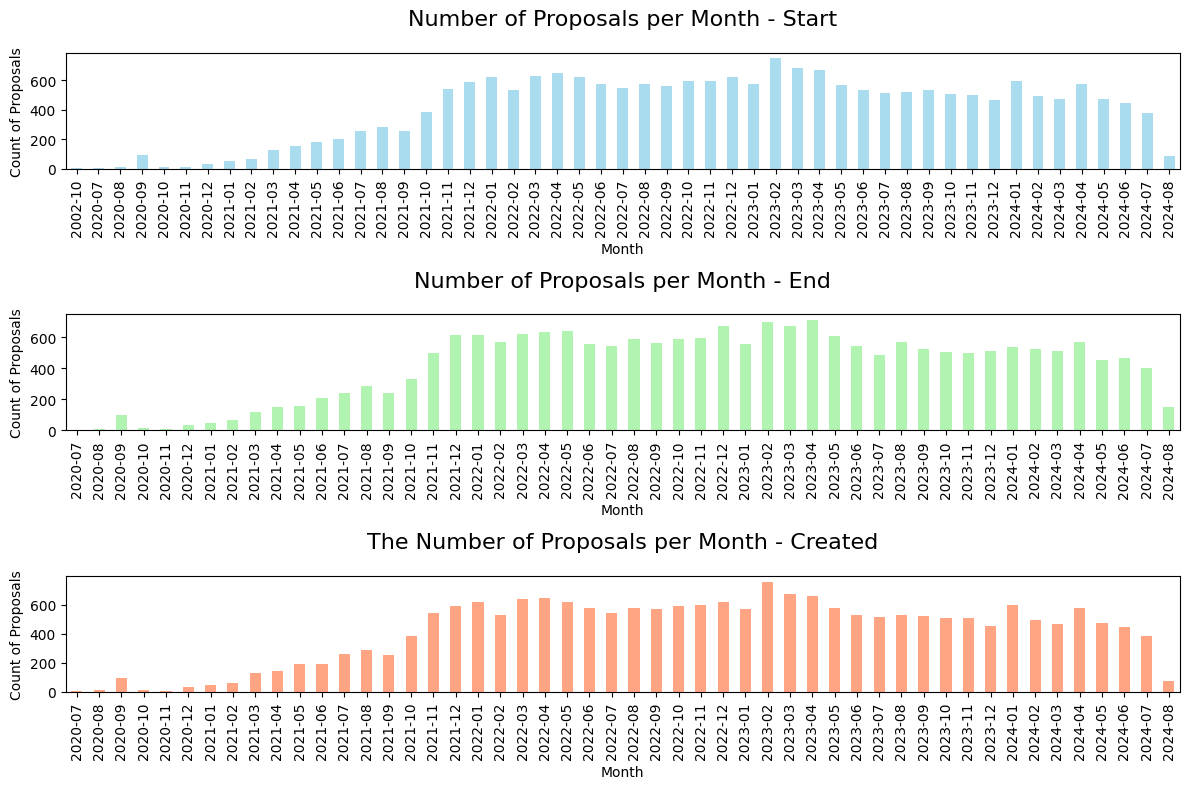

In [25]:
# First, convert the 'start' column to datetime if it's not already
df['start'] = pd.to_datetime(df['start'])
df['end'] = pd.to_datetime(df['end'])
df['created'] = pd.to_datetime(df['created'])

# Extract the month and year from the 'start' column
df['year_month_start'] = df['start'].dt.to_period('M')
df['year_month_end'] = df['end'].dt.to_period('M')
df['year_month_created'] = df['created'].dt.to_period('M')

# Now count the number of occurrences per month
monthly_counts_start = df['year_month_start'].value_counts().sort_index()
monthly_counts_end = df['year_month_end'].value_counts().sort_index()
monthly_counts_created = df['year_month_created'].value_counts().sort_index()

# Plotting the histogram with less crowded x-axis labels
plt.figure(figsize=(12, 8))

# First subplot for 'start'
plt.subplot(3, 1, 1)
monthly_counts_start.plot(kind='bar', color='skyblue', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Count of Proposals')
plt.title('Number of Proposals per Month - Start', pad=20, fontsize=16)

# Second subplot for 'end'
plt.subplot(3, 1, 2)
monthly_counts_end.plot(kind='bar', color='lightgreen', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Count of Proposals')
plt.title('Number of Proposals per Month - End', pad=20, fontsize=16)

# Third subplot for 'created'
plt.subplot(3, 1, 3)
monthly_counts_created.plot(kind='bar', color='coral', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Count of Proposals')
plt.title('The Number of Proposals per Month - Created', pad=20, fontsize=16)

plt.tight_layout()
plt.show()

### Duration of Proposal 
- Unit: Hour

In [26]:
# Calculate the duration for each proposal
df['duration'] = (df['end'] - df['start']).dt.total_seconds() / 3600  # Convert to hours
df["duration"].describe()

count     20767.000000
mean        185.428421
std        1365.078343
min           0.359722
25%          72.000000
50%          96.514722
75%         168.000000
max      176653.250000
Name: duration, dtype: float64

Remove the top and bottom 5% of the duration values

In [27]:
top = df["duration"].quantile(0.95)
bottom = df["duration"].quantile(0.05)
simple_duration = df[(df["duration"] > bottom) & (df["duration"] < top)]["duration"]
simple_duration.describe()

count    18202.000000
mean       112.794814
std         52.561070
min         37.498611
25%         72.000000
50%         96.000000
75%        167.962431
max        335.995833
Name: duration, dtype: float64

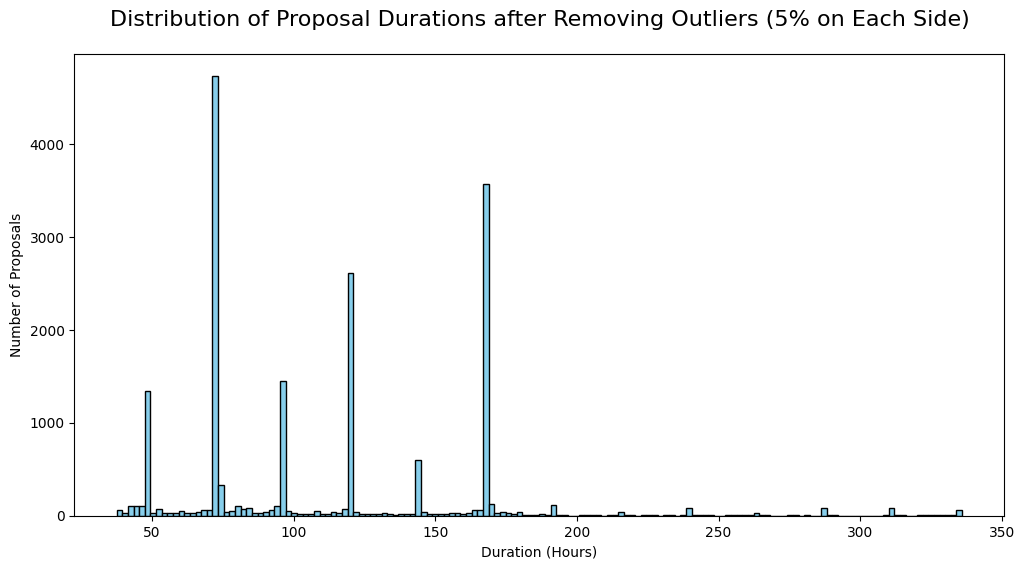

In [28]:
plt.figure(figsize=(12, 6))
plt.hist(simple_duration, bins=150, color='skyblue', edgecolor='black',)
plt.xlabel('Duration (Hours)')
plt.ylabel('Number of Proposals')
plt.title('Distribution of Proposal Durations after Removing Outliers (5% on Each Side)',
            pad=20, fontsize=16)
plt.show()